### 학습 목표
- 선형분류모델에 대해서 알 수 있다.
- 직원의 이직여부를 예측하는 선형분류모델을 설계하자
- 선형분류모델 평가

### 1. 문제 정의
- BX : 최근 이직 시장이 활발하게 성장함에 따라 직원들도 줄줄이 퇴사 행렬을 이어가고 있다. 경영진은 핵심인재 유출을 최대한 줄이고, 오랜시간 함께 성장할 수 있는 회사를 만들고 싶다.
- CX : 자신의 성장을 느낄 수 있는 회사, 성과에 따른 적절한 보상과 효율적인 업무를 진행 할 수 있는 회사
- DX : 데이터분석을 통해 이직률과 연관이 있는 사항들을 지속적으로 확인하고 개선, HR팀은 이직 가능성이 높은 핵심 인재를 예측하고 해당 인원을 위한 관리 프로그램을 운영

### 2. 데이터 수집

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/job_transfer.csv')
data.info()
# 결측치 없음
# 정답데이터 1개(Attrition : 이직 여부)
# 34개의 입력특성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

| 컬럼명                      | 설명                                                                          |
| ------------------------ | --------------------------------------------------------------------------- |
| Age                      | 직원의 나이                                                                      |
| Attrition                | 직원의 이직 여부 (Yes / No)                                                        |
| BusinessTravel           | 직원의 출장 빈도 (Non-Travel, Travel_Rarely, Travel_Frequently)                    |
| DailyRate                | 직원의 일일 급여                                                                   |
| Department               | 직원이 속한 부서 (Research & Development, Sales, Human Resources)                  |
| DistanceFromHome         | 직원의 집으로부터 회사까지의 거리                                                          |
| Education                | 직원의 학력 수준 (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor) |
| EducationField           | 직원의 전공 분야                                                                   |
| EmployeeCount            | 직원 수 (모든 값이 1로 동일)                                                          |
| EmployeeNumber           | 직원의 고유 번호                                                                   |
| EnvironmentSatisfaction  | 직원의 업무 환경 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)                    |
| Gender                   | 직원의 성별 (Male, Female)                                                       |
| HourlyRate               | 직원의 시간당 급여                                                                  |
| JobInvolvement           | 직원의 직무 참여도 (1: Low, 2: Medium, 3: High, 4: Very High)                       |
| JobLevel                 | 직원의 직급                                                                      |
| JobRole                  | 직원의 직무                                                                      |
| JobSatisfaction          | 직원의 직무 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)                       |
| MaritalStatus            | 직원의 결혼 여부 (Single, Married, Divorced)                                       |
| MonthlyIncome            | 직원의 월급                                                                      |
| MonthlyRate              | 직원의 월별 급여 총액                                                                |
| NumCompaniesWorked       | 직원이 근무한 회사 수                                                                |
| Over18                   | 직원이 18세 이상인지 여부 (모든 값이 Y로 동일)                                               |
| OverTime                 | 직원의 초과 근무 여부 (Yes / No)                                                     |
| PercentSalaryHike        | 직원의 급여 인상 비율                                                                |
| PerformanceRating        | 직원의 성과 평가 등급 (1: Low, 2: Good, 3: Excellent, 4: Outstanding)                |
| RelationshipSatisfaction | 직원의 동료와의 관계 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)                  |
| StandardHours            | 직원의 표준 근무 시간 (모든 값이 80으로 동일)                                                |
| StockOptionLevel         | 직원의 주식 옵션 수준 (0, 1, 2, 3)                                                   |
| TotalWorkingYears        | 직원의 총 근무 연수                                                                 |
| TrainingTimesLastYear    | 지난해 직원이 받은 교육 횟수                                                            |
| WorkLifeBalance          | 직원의 일-생활 균형 만족도 (1: Bad, 2: Good, 3: Better, 4: Best)                       |
| YearsAtCompany           | 직원이 현재 회사에서 근무한 기간                                                          |
| YearsInCurrentRole       | 직원이 현재 역할에서 근무한 기간                                                          |
| YearsSinceLastPromotion  | 직원의 마지막 승진 이후 경과된 기간                                                        |
| YearsWithCurrManager     | 직원이 현재 관리자와 함께 일한 기간                                                        |


### 3. 전처리
- 결측치 없음

### 4. 탐색적 데이터 분석

In [5]:
# 이직률 확인
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [7]:
# 학습 및 집계를 위하여 이직데이터 숫자데이터로 변경
# 이직안함 -> 0, 이직 -> 1
data['Attrition'] = np.where(data['Attrition'] == 'Yes', 1, 0)
# np.where(조건식, True일때 값, False일때 값)

In [9]:
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [10]:
# 이직률
237/(1233+237)

0.16122448979591836

In [12]:
# 나이 -> 연속적 숫자형태로 되어있음 -> 구간을 나눠서 그룹화
data['Age']

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [13]:
# where함수 사용 -> 연령대 그룹화
# 30세 이하, 31~40세, 40세 초과
data['Age_gp'] = np.where(data['Age'] <= 30, '30세 이하', np.where(data['Age'] <= 40, '31~40세', '40세 초과'))
data[['Age', 'Age_gp']]

,Age,Age_gp
0,41,40세 초과
1,49,40세 초과
2,37,31~40세
3,33,31~40세
4,27,30세 이하
...,...,...
1465,36,31~40세
1466,39,31~40세
1467,27,30세 이하
1468,49,40세 초과


In [18]:
# 연령대별 이직률
# 데이터(sum) / 전체 (count)
df_gp = data.groupby('Age_gp')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round( (df_gp['sum'] / df_gp['count'])*100, 1 )
df_gp

# 나이가 어릴수록 이직률이 높음을 확인

,count,sum,ratio
Age_gp,,,
30세 이하,386,100,25.9
31~40세,619,85,13.7
40세 초과,465,52,11.2


In [20]:
data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [23]:
# 성별 대비 이직률 확인
gender_gp = data.groupby('Gender')['Attrition'].agg(['count', 'sum'])
gender_gp['ratio'] = round( (gender_gp['sum']/gender_gp['count'])*100, 1 )
gender_gp

,count,sum,ratio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [24]:
data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [26]:
# 부서별 이직률 현황
gender_gp = data.groupby('Department')['Attrition'].agg(['count', 'sum'])
gender_gp['ratio'] = round( (gender_gp['sum']/gender_gp['count'])*100, 1 )
gender_gp

,count,sum,ratio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


- 가설1. 업무만족도가 높더라도, 인간관계로 인한 이직률은 높을 것이다.

In [27]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_gp'],
      dtype='object')

In [28]:
# 인간관계만족도, 업무만족도, 이직간의 관계 확인
# JobSatisfaction 업무만족도 -> 숫자가 클수록 만족
# RelationshipSatisfaction 인간관계만족도
data[['JobSatisfaction','RelationshipSatisfaction','Attrition']]

,JobSatisfaction,RelationshipSatisfaction,Attrition
0,4,1,1
1,2,4,0
2,3,2,1
3,3,3,0
4,2,4,0
...,...,...,...
1465,4,3,0
1466,1,1,0
1467,2,2,0
1468,2,4,0


In [32]:
df_gp = data.groupby('JobSatisfaction')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round ( (df_gp['sum']/df_gp['count'])*100, 1)
df_gp
# 업무만족도가 낮을수록 이직률이 높다

,count,sum,ratio
JobSatisfaction,,,
1,289,66,22.8
2,280,46,16.4
3,442,73,16.5
4,459,52,11.3


In [33]:
df_gp = data.groupby('RelationshipSatisfaction')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round ( (df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
RelationshipSatisfaction,,,
1,276,57,20.7
2,303,45,14.9
3,459,71,15.5
4,432,64,14.8


In [35]:
# (업무만족도와 인간관계만족도)에 따른 이직률 현황
df_gp = data.groupby(['JobSatisfaction','RelationshipSatisfaction'])['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round ( (df_gp['sum']/df_gp['count'])*100, 1)
df_gp
# 업무만족도가 낮은 직원은 인간관계만족도가 낮으수록 이직률이 증가
# 업무 만족도가 높은 직원은 인간관계만족도 영향을 덜받는다.

count  sum  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                            54   16   29.6
                2                            57   15   26.3
                3                            91   22   24.2
                4                            87   13   14.9
2               1                            53   15   28.3
                2                            57    8   14.0
                3                            81   13   16.0
                4                            89   10   11.2
3               1                            85   16   18.8
                2                            94   11   11.7
                3                           133   19   14.3
                4                           130   27   20.8
4               1                            84   10   11.9
                2                            95   11   11.6
                3                           154   17   11.0
                4                           126   14   11.1

가설1 결론. 업무만족도가 높으나, 인간관계로 인한 이직률이 높을 것이다.
-> 가설 기각

- 업무만족도가 높을수록 인간관계로 인한 영향이 적다.
- 업무만족도가 낮을수록 인간관계에 영향이 높다. -> 업무만족도가 낮은 인원들에게는 인간관계 프로그램 추천

### 가설2. 근속년수 대비 같은 업무를 한 비중이 높다면 이직률이 높을것이다.

In [36]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_gp'],
      dtype='object')

In [ ]:
# YearsAtCompany 근속년수
# YearsInCurrentRole 직원이 현재 역할에서 근무한 기간

In [38]:
# 근속년수 대비 한가지 업무에서 진행 비율
data['RoleCompany'] = data['YearsInCurrentRole'] / data['YearsAtCompany']
data['RoleCompany']

0       0.666667
1       0.700000
2            NaN
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: RoleCompany, Length: 1470, dtype: float64

In [39]:
# 결측치 0으로 채워주기
data['RoleCompany'].fillna(0, inplace=True)

data['RoleCompany']

0       0.666667
1       0.700000
2       0.000000
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: RoleCompany, Length: 1470, dtype: float64

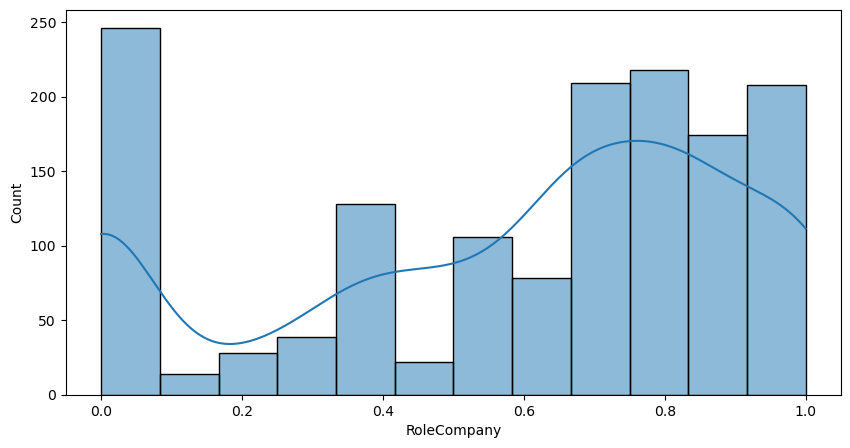

In [42]:
# RoleCompany 분포 확인
# distplot -> 데이터의 분포를 시각화하는데 사용
# 히스토그램과 커널밀도추정을 함께 그려 데이터의 분포 파악 용이
plt.figure(figsize=(10,5))
# sns.distplot(data['RoleCompany'])
sns.histplot(data['RoleCompany'], kde=True) # kde(kernel density estimation)
plt.show()

In [43]:
# RoleCompany 구간화 작업 후 구간별 이직률
# 0.3 이하, 0.3초과 0.6이하, 0.6초과
data['RoleCompany_gp'] = np.where(data['RoleCompany'] <= 0.3, '0.3 이하', 
                                  np.where(data['RoleCompany'] <= 0.6, '0.3초과 0.6이하', '0.6 초과'))

In [44]:

df_gp = data.groupby('RoleCompany_gp')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round ( (df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
RoleCompany_gp,,,
0.3 이하,323,89,27.6
0.3초과 0.6이하,321,38,11.8
0.6 초과,826,110,13.3


- 가설2 결론
  - 근속년수 대비 한 업무에 오래 근무할수록 이직률이 낮다
  - 가설2 기각

### 가설3) 야근을 많이해도 급여인상률이 높다면 이직률이 낮을것이다.

In [45]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_gp', 'RoleCompany', 'RoleCompany_gp'],
      dtype='object')

In [46]:
# 야근 여부 (OverTime)에 따른 이직률
df_gp = data.groupby('OverTime')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round ( (df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
OverTime,,,
No,1054,110,10.4
Yes,416,127,30.5


In [47]:
# 연봉인상률(PercentSalaryHike)에 따른 이직률
df_gp = data.groupby('PercentSalaryHike')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round ( (df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
PercentSalaryHike,,,
11,210,41,19.5
12,198,33,16.7
13,209,34,16.3
14,201,24,11.9
15,101,18,17.8
16,78,14,17.9
17,82,14,17.1
18,89,13,14.6
19,76,9,11.8


In [48]:
# (야근 여부와 연봉인상률)에 따른 이직여부
df_gp = data.groupby(['OverTime','PercentSalaryHike'])['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round ( (df_gp['sum']/df_gp['count'])*100, 1)
df_gp
# 야근을 많이하는 사람들은 높은 연봉인상에도 불구하고 이직률이 눈에띄게 낮아지지는 않는다.

count  sum  ratio
OverTime PercentSalaryHike                   
No       11                   149   19   12.8
         12                   139   18   12.9
         13                   144   14    9.7
         14                   145    8    5.5
         15                    80   12   15.0
         16                    55    8   14.5
         17                    66    9   13.6
         18                    60    5    8.3
         19                    55    3    5.5
         20                    40    4   10.0
         21                    36    2    5.6
         22                    41    6   14.6
         23                    19    1    5.3
         24                    12    1    8.3
         25                    13    0    0.0
Yes      11                    61   22   36.1
         12                    59   15   25.4
         13                    65   20   30.8
         14                    56   16   28.6
         15                    21    6   28.6
         16                    23    6   26.1
         17                    16    5   31.2
         18                    29    8   27.6
         19                    21    6   28.6
         20                    15    3   20.0
         21                    12    3   25.0
         22                    15    6   40.0
         23                     9    5   55.6
         24                     9    5   55.6
         25                     5    1   20.0

In [51]:
# 위 요약 데이터에서 야근 No 직원의 평균 이직률
df_gp_plot = df_gp.reset_index()
df_gp_plot[df_gp_plot['OverTime'] == 'No']['ratio'].mean()

np.float64(9.440000000000001)

In [52]:
# 위 요약 데이터에서 야근 Yes 직원의 평균 이직률
df_gp_plot = df_gp.reset_index()
df_gp_plot[df_gp_plot['OverTime'] == 'Yes']['ratio'].mean()

np.float64(31.94666666666667)

### 5. 모델 선택 및 하이퍼파라미터 튜닝
- 문제데이터 확인 (인코딩 필요)
- X, y 데이터 분리
- train, test 데이터 분리
- 학습
- 평가

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [54]:
# 가설검증을 위해 생성했던 컬럼 삭제
X = data.drop(['Attrition', 'Age_gp','RoleCompany','RoleCompany_gp' ], axis=1)
y = data['Attrition']

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [58]:
# BusinessTravel(출장)
# 레이블 인코딩 : 값의 크고 작음의 의미가 있을 때
X['BusinessTravel'].unique()
# Travel_Rarely : 출장 가끔 있다. -> 2
# Travel_Frequently : 출장이 잦다. -> 3
# Non-Travel : 출장이 없다. -> 1

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [63]:
# 딕셔너리로 정의(우선순위를 주고 싶은 데이터에 큰 숫자를 연결)
BT_dict = {'Non-Travel' : 1,
           'Travel_Rarely' : 2,
           'Travel_Frequently' : 3
}

# 딕셔너리에 연결된 value값으로 바꿀 수 있도록 맵핑
# map() : 값을 맵핑, key값을 찾아서, 해당 value값으로 변경
X['BusinessTravel'] = X['BusinessTravel'].map(BT_dict)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   int64 
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [65]:
# 나머지 컬럼들 원핫인코딩 진행
X_one_hot = pd.get_dummies(X, dtype=int)

In [66]:
X_one_hot

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,2,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,3,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,2,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,3,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,2,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,884,23,2,1,2061,3,41,4,...,0,0,0,0,0,1,0,1,1,0
1466,39,2,613,6,1,1,2062,4,42,2,...,0,0,0,0,0,1,0,1,1,0
1467,27,2,155,4,3,1,2064,2,87,4,...,0,0,0,0,0,1,0,1,0,1
1468,49,3,1023,2,3,1,2065,4,63,2,...,0,0,1,0,0,1,0,1,1,0


In [67]:
#train, test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.3, random_state=23)

In [68]:
from sklearn.linear_model import LogisticRegression # 로지스틱회귀모형(선형분류모델)

In [71]:
# 객체 생성
lr_model = LogisticRegression()
# 모델 학습
lr_model.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
lr_model.score(X_train, y_train)

0.8483965014577259

In [73]:
# 분류기때문에 정확도
lr_model.score(X_test, y_test)

0.8253968253968254

In [74]:
# 객체 생성
lr_model = LogisticRegression(max_iter=5000)
# 모델 학습
lr_model.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [75]:
lr_model.score(X_train, y_train)

0.901846452866861

In [76]:
# 분류기때문에 정확도
lr_model.score(X_test, y_test)

0.8820861678004536

In [77]:
import warnings
warnings.filterwarnings('ignore')

### 교차검증
- 모델의 일반화 성능 측정
  - 모델이 데이터에 대해 얼마나 잘 맞추는지 평가, 한번 평가하는게 아닌 여러번에 걸쳐 평가하는것이 신뢰도 높음
- 방법 : (훈련데이터 내에서)훈련세트와 테스트 세트로 나눠 여러번 평가
- 모델의 정확도와 안정성 파악
- 평균적인 성능이 높다면 일반화된 모델이라 판단 가능
- 장점 :
  - 과적합 감소에 도움
  - 모델이 훈련데이터의 변경에 얼마나 민감한지 확인
  - 데이터셋이 적은 경우 유용하게 상요됨
- 단점 : 여러번 학습하고 평가 -> 계산량 많아짐 -> 시간, 비용 많이듦

In [79]:
# 교차검증
from sklearn.model_selection import cross_val_score

cross_val_score(lr_model, X_train, y_train, cv =5)

array([0.88834951, 0.89320388, 0.88834951, 0.88349515, 0.90731707])

In [80]:
cross_val_score(lr_model, X_train, y_train, cv =5).mean()

np.float64(0.8921430262846318)

- Support Vector Machine
  - 데이터를 나누는 직선(영역)을 그어서, 클래스 나눔

In [83]:
from sklearn.svm import LinearSVC
# 모델 객체 생성
svm_model = LinearSVC()

# 모델 학습
svm_model.fit(X_train, y_train)

# 모델 교차검증
result = cross_val_score(svm_model, X_train, y_train, cv = 5)
result.mean()

np.float64(0.8814539426947668)

In [84]:
# test
svm_model.score(X_test, y_test)

0.8662131519274376

In [85]:
from sklearn.metrics import classification_report
pre = svm_model.predict(X_test)
print(classification_report(y_test, pre))  # 실제값 먼저

# support : 각 클래스의 실제 샘플 수

# 해석
# class 0 -> 잘 예측하고있다. (정밀도precision, 재현율recall, 정확도 모두 높음)

# class 1 -> 높은 정밀도, 낮은 재현율
# class 1 -> 정밀도? 재현율? 뭐가 더 중요?
# 재현율이 더 중요!

# FP : 0을 1로 착각 // 회사 계속 다닐 직원을, 이직할꺼라고 착각
# FN : 1을 0으로 착각 // 이직을 마음먹은 직원을, 회사 뼈를 묻을거라고 착각

# 정밀도 : 0.88
# 재현율 : 0.28
# 정확도가 높더라도, 모델의 성능개선이 필요하다

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       363
           1       0.88      0.28      0.43        78

    accuracy                           0.87       441
   macro avg       0.87      0.64      0.68       441
weighted avg       0.87      0.87      0.84       441



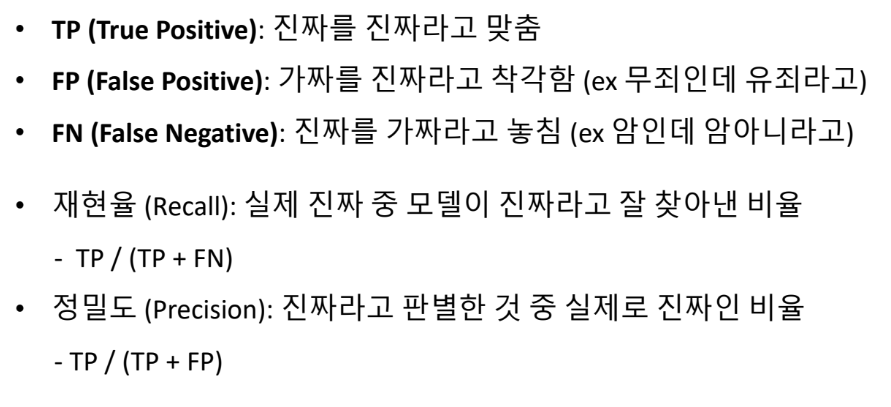